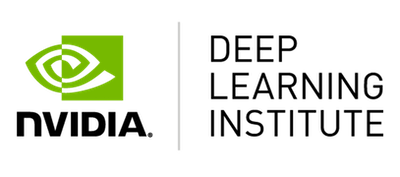

# 1.0 Transformer 아키텍처가 NMT에 가져온 변화
이 노트북에서는 Transformer 아키텍처와 모델, 그리고 이것이 NMT에 미치는 영향을 개괄적으로 살펴보겠습니다.

**1.1 NMT(Neural Machine Translation)<br>**

**1.2 Transformer 아키텍처 개요<br>**

**1.3 Attention이란 무엇인가?<br>**

**1.4 Transformer 모델 개요<br>**

# 1.1 NMT(Neural Machine Translation)

NMT는 자동화된 언어 번역을 위한 엔드 투 엔드 러닝 접근 방식입니다. NMT는 기존의 구문 기반 통계 기계 번역 시스템의 여러 가지 약점을 극복할 수 있습니다. 기계 번역은 지난 몇 년간 큰 성공을 거뒀지만 여전히 어려운 작업으로 남아 있습니다.

NMT와 언어 이해 모델의 최근 역사를 살펴보겠습니다.

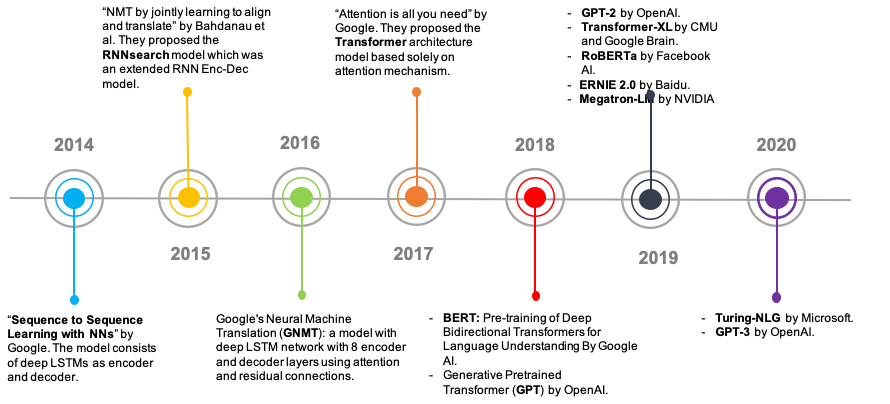

2017년에 소개된 Transformer 아키텍처는 NMT에 중대한 이정표를 제공했습니다.  또한 Transformer는 그 이후에 개발되어 광범위한 NLP 작업에 사용되고 있는 수많은 모델의 기반이 되었기에 , 이렇게 Transformer 작동 방식을 자세히 살펴보는 것입니다.

# 1.2 Transformer 아키텍처 개요

Transformer는 RNN(순환 뉴럴 네트워크)을 사용하여 다양한 시퀀스 모델링 작업을 수행하는 모델을 대체할 수 있는 경쟁력을 갖고 있습니다. 이는 Transformer의 연산이 순차적이라는 RNN의 중대한 단점을 해결해 주기 때문입니다. RNN은 한 번에 한 단어를 읽어야 하므로 인접한 단어의 의미적 연관성에 대한 결과를 얻으려면 여러 단계를 수행해야 합니다. 

반면, Transformer는 문장의 모든 단어 사이의 관계를 직접 모델링하는 Self-Attention 메커니즘에 *전적으로* 의존합니다.  맥락 정보를 포함하는 각 입력 기호(단어 등)에 대해 벡터가 계산됩니다. 네트워크는 보다 쉽게 병렬화되므로 더 효율적입니다. Transformer는 Self-Attention 메커니즘과 Feed forward 연결을 통해 번역 품질과 속도 모두에 있어서 NMT 분야를 한층 더 발전시켰습니다.

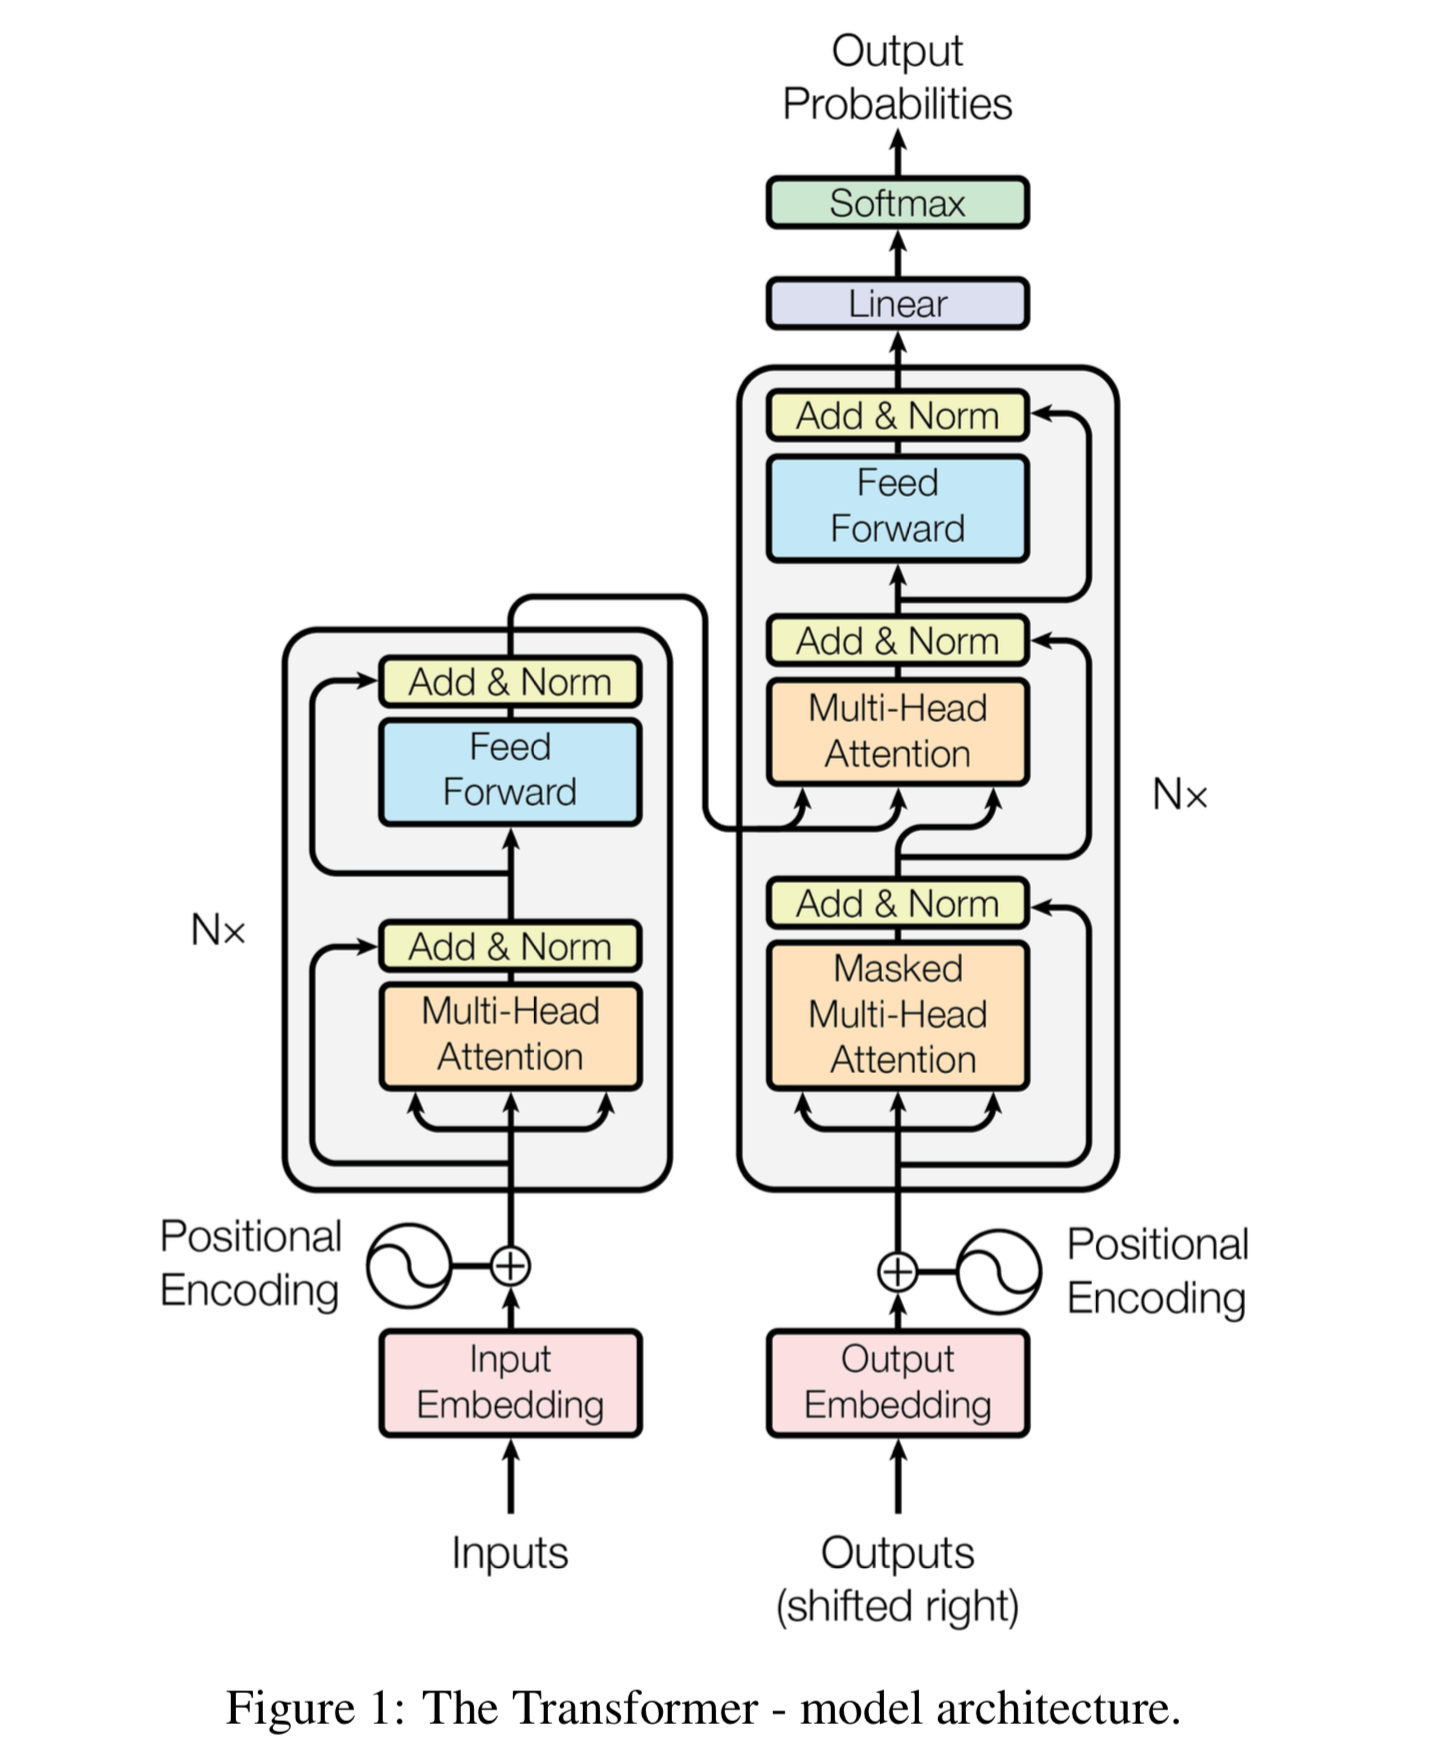

이미지 크레딧: [Attention is all you need](https://arxiv.org/abs/1706.03762).

요약하자면, RNN 기반 시퀀스-시퀀스(Seq2Seq) 모델/네트워크 대비 Transformer의 이점은 다음과 같습니다.
1.	Transformer는 반복을 Attention으로 대체하고 입력 시퀀스 내에서 각 기호의 위치를 인코딩하여 병렬화를 실현합니다. 따라서 트레이닝 시간이 단축됩니다.
2.	Transformer는 입력/출력 시퀀스의 두 기호를 상수 O(1) 연산 수에 연결하여 순차 연산의 수를 줄입니다. Transformer는 입력 또는 출력 문장에서의 거리에 관계없이 종속성을 모델링할 수 있게 해 주는 Attention 메커니즘을 사용하여 이를 실현합니다.

일반적으로 seq2seq 모델은 인코더와 디코더로 구성됩니다. 인코더가 입력 시퀀스를 취해 더 높은 차원의 공간에 n-차원 벡터로 매핑합니다. 그런 다음 이 추상적인 벡터가 디코더에 피드되어 출력 시퀀스로 전환됩니다. 출력 시퀀스는 다른 언어, 기호 또는 심지어 그림 형식일 수 있습니다.

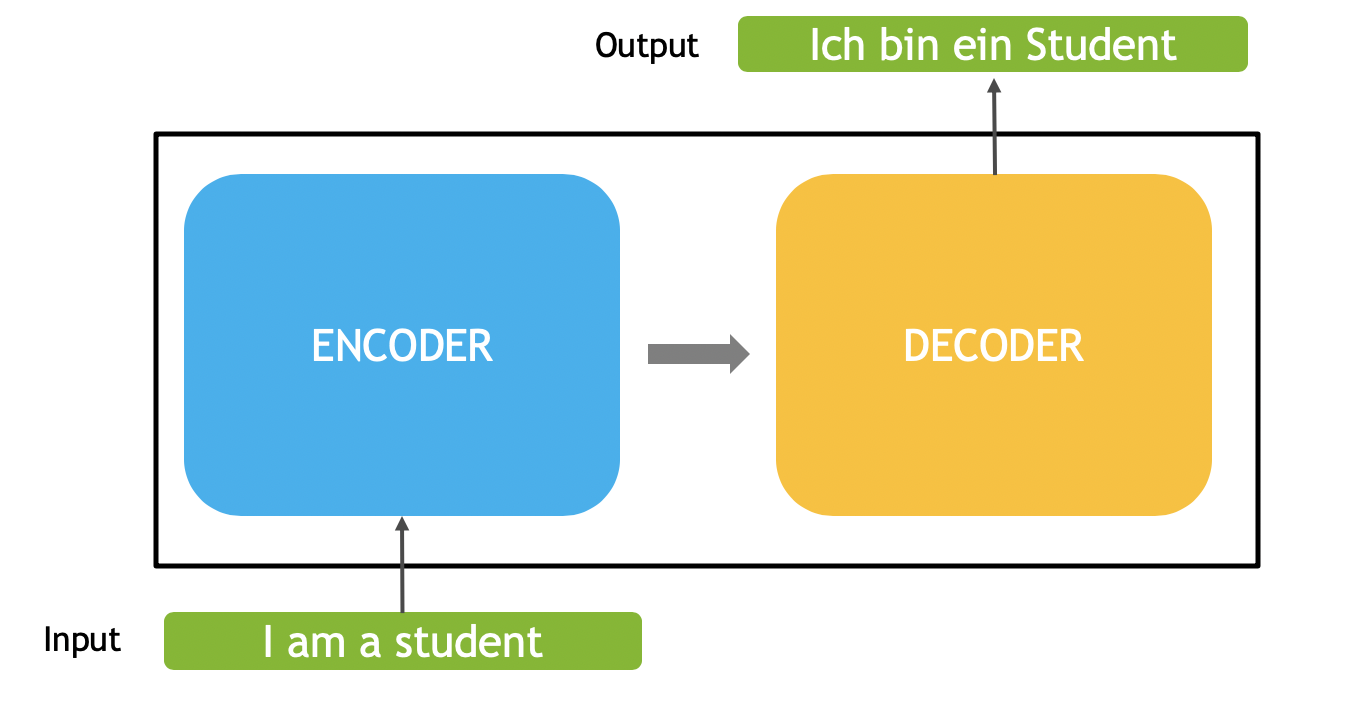

<center> 그림 2: 인코더-디코더 표현. </center>

# 1.3 Attention이란 무엇인가?

Transformer 모델의 핵심은 "Attention" 메커니즘입니다. 

쉽게 설명해 딥러닝의 Attention은 인간이 시각적인 장면을 볼 수 있는 방식을 모방한 것이라고 볼 수 있습니다. 우리는 일반적으로 시야에 들어오는 모든 것을 살피지 않으며 그보다는 장면의 맥락에 따라 중요한 특징에 집중합니다.  마찬가지로, 언어에서도 다시 맥락에 따라 다른 단어에 적용될 때 특정한 중요 단어에 더 집중합니다.

Attention 메커니즘은 입력 시퀀스를 살펴보고 각 단계에서 시퀀스의 어떤 부분이 중요한지 결정합니다. 딥러닝의 Attention은 중요도 가중치의 벡터로 해석될 수 있습니다. 아래 예에서 "ball"은 "tennis"와 "playing" 모두에서 강한 Attention이 있지만 "tennis"와 "dog"은 연관성이 약합니다.

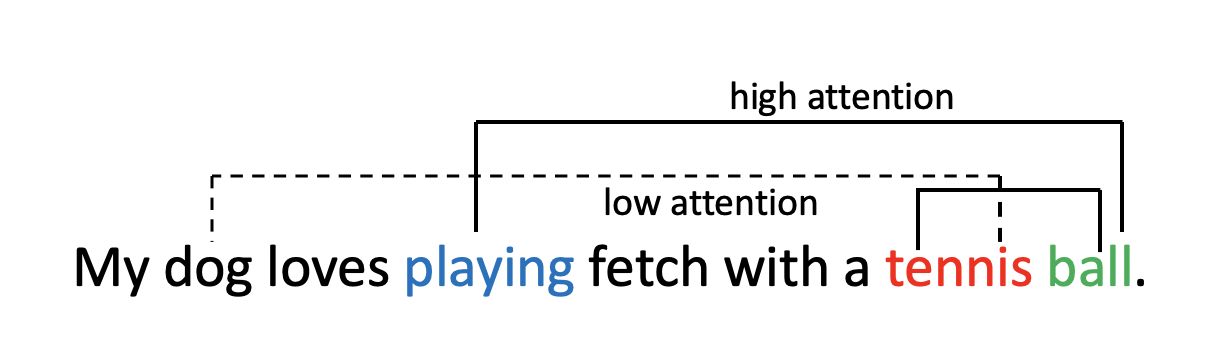

<center> 그림 3: Attention 메커니즘의 가설 예.

# 1.4 Transformer 모델 개요

[PyTorch 모듈](https://pytorch.org/docs/stable/generated/torch.nn.Module.html) 기본 클래스를 기반으로 기본 Transformer 모델 코드를 살펴보겠습니다. 기본 모델은 아래의 `forward` 메서드에 나와 있습니다. 데이터가 인코더를 통과한 다음 디코더를 통과합니다.

In [1]:
import torch.nn as nn
class TransformerModel(nn.Module):

    def __init__(self, encoder, decoder):
        super().__init__()
        self._is_generation_fast = False
        self.encoder = encoder
        self.decoder = decoder
        
    def forward(self, src_tokens, src_lengths, prev_output_tokens):
        encoder_out, padding_mask = self.encoder(src_tokens, src_lengths)
        decoder_out = self.decoder(prev_output_tokens, encoder_out, padding_mask)
        return decoder_out

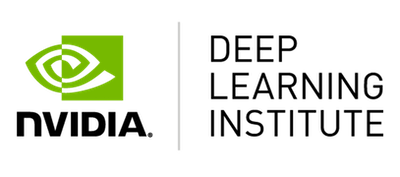